Import Libraries

In [1]:
#import useful libraries

#For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#From scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score



In [2]:
!pip install xgboost
!pip install lightgbm

In [3]:
import xgboost as xgb
import lightgbm as lgb

Data Preparation

In [4]:
#import dataset
df = pd.read_csv('Data_for_UCI_named.csv')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [10]:
#since stabf is an object dtype, encoding is to be performed on it to prompt analysis

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['stabf'] = encoder.fit_transform(df['stabf'])


In [11]:
df['stabf'].value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

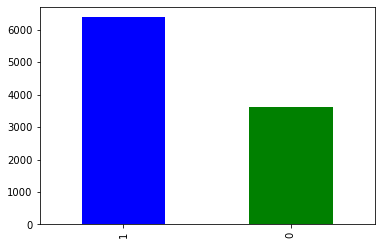

In [12]:
df['stabf'].value_counts().plot(kind = 'bar', color = ['blue', 'green']);

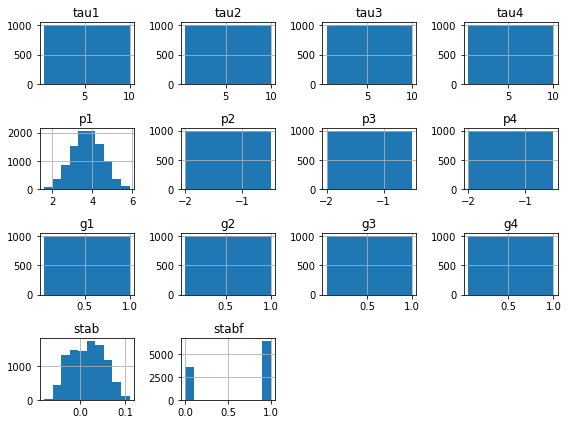

In [13]:
#hist_plot for better data comprehension
df.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

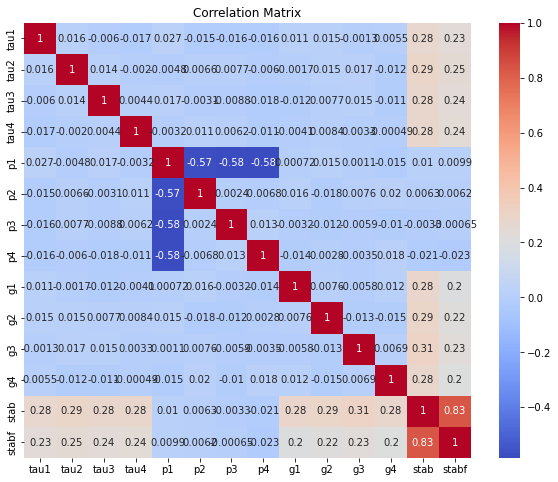

In [14]:
#heatmap to analyze the relationships between variables

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Modelling

In [15]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,1


In [16]:
# Drop the 'stab' column
df.drop('stab', axis=1, inplace=True)

# Split the data into train and test sets
X = df.drop('stabf', axis=1)
y = df['stabf']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training set
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test set
x_test_scaled = scaler.transform(x_test)

In [18]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(x_train_scaled, y_train)

# Create and train the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=1)
et_classifier.fit(x_train_scaled, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(x_test_scaled)
et_predictions = et_classifier.predict(x_test_scaled)

# Calculate accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
et_accuracy = accuracy_score(y_test, et_predictions)


In [19]:
#to check for accuracy
print("Random Forest Classifier Accuracy:", rf_accuracy)


Random Forest Classifier Accuracy: 0.929


In [20]:
print("Extra Trees Classifier Accuracy:", et_accuracy)


Extra Trees Classifier Accuracy: 0.928


In [21]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(x_train_scaled, y_train)

# Create and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=1)
lgb_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(x_test_scaled)
lgb_predictions = lgb_model.predict(x_test_scaled)

# Calculate accuracy scores
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)


In [22]:
print("XGBoost Model Accuracy:", xgb_accuracy)


XGBoost Model Accuracy: 0.9455


Working on the test last night all the accuracy checks were giving me 1.00, because of time, I randomly picked from the options in the test. Just to run the codes now and I'm getting accuracy scores.. I didn't submit immediately cause of power failure last night.